In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [61]:
# read_csv里面的参数是csv文件的路径，此处文件在notebook运行目录下面的CCPP目录
data = pd.read_csv('.\CCPP\ccpp.csv')
data.head()#读取前五行数据

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [62]:
data.shape

(9568, 5)

In [65]:
X = data[['AT', 'V', 'AP', 'RH']]
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [66]:
y = data[['PE']]
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [71]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


In [72]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [74]:
#拟合完毕后，我们看看我们的需要的模型系数结果：
print (linreg.intercept_)
print (linreg.coef_)#得出PE=447.06297099−1.97376045∗AT−0.23229086∗V+0.0693515∗AP−0.15806957∗RH

[447.06297099]
[[-1.97376045 -0.23229086  0.0693515  -0.15806957]]


In [75]:
#评估模型的好坏程度，对于线性回归来说，我们一般用均方差（Mean Squared Error, MSE）
#或者均方根差(Root Mean Squared Error, RMSE)在测试集上的表现来评价模型的好坏。

In [77]:
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#得到了MSE或者RMSE，如果我们用其他方法得到了不同的系数，需要选择模型时，就用MSE小的时候对应的参数。

MSE: 20.080401202073897
RMSE: 4.481116066570236


In [79]:
#比如这次我们用AT， V，AP这3个列作为样本特征。不要RH， 输出仍然是PE。代码如下：
X = data[['AT', 'V', 'AP']]
y = data[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#可以看出，去掉RH后，模型拟合的没有加上RH的好，MSE变大了。

MSE: 23.208907470136236
RMSE: 4.817562399194871


In [81]:
#通过交叉验证来持续优化模型,我们采用10折交叉验证，即cross_val_predict中的cv参数为10
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(y, predicted))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))
#可以看出，采用交叉验证模型的MSE比第6节的大，主要原因是我们这里是对所有折的样本做测试集对应的预测值的MSE，
#而第6节仅仅对25%的测试集做了MSE。两者的先决条件并不同。

MSE: 20.795597461943103
RMSE: 4.560219014690315


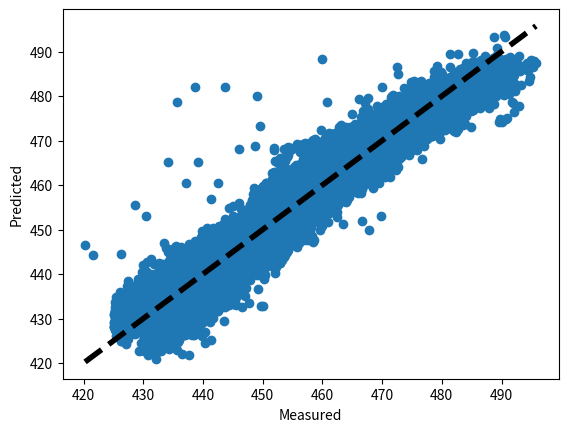

In [82]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
#######################################





#########                        岭          回          归                         ##########






###########

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [14]:
data = pd.read_csv(".\CCPP\ccpp.csv")


In [15]:
x = data[["AT", 'V', 'AP', 'RH']]
y = data[['PE']]

In [16]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

In [17]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [18]:
print(ridge.coef_)
print(ridge.intercept_)

[[-1.97373209 -0.2323016   0.06935852 -0.15806479]]
[447.05552892]


In [20]:
# 用scikit-learn选择Ridge回归超参数
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 3, 5, 7, 10, 20, 100])
ridgecv.fit(x_train, y_train)
ridgecv.alpha_  

7.0